In [1]:
%%time
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense, Input, Dropout, LeakyReLU, BatchNormalization
from tensorflow.keras.optimizers import Adam
tf.compat.v1.disable_eager_execution()

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# x_train : [50000, 32, 32, 3], y_train : [50000, 1], x_test : [10000, 32, 32, 3], y_test : [10000, 1]
class_num = 10
    
x_train = x_train.astype('float32') / 255.0 # normalization
x_test = x_test.astype('float32') / 255.0
    
y_train = to_categorical(y_train, class_num) # (one-hot encoding) convert to [50000, 10], [10000, 10]
y_test = to_categorical(y_test, class_num)

CPU times: user 3.22 s, sys: 668 ms, total: 3.89 s
Wall time: 3.26 s


In [3]:
%%time
# tf.compat.v1.disable_eager_execution()
with tf.xla.experimental.jit_scope():
    input_layer = Input(shape=(32, 32, 3))
    x = Flatten()(input_layer) # Flatten 클래스 객체를 만든 다음 이 객체를 매개변수 input_layer로 호출(__call__메서드 호출)
    x = Dense(300)(x) # Dense(a.k.a fully connected layer) 
    x = BatchNormalization(momentum=0.9)(x)
    x = LeakyReLU(alpha = 0.1)(x)
    x = Dense(150)(x)
    x = BatchNormalization(momentum=0.9)(x)
    x = LeakyReLU(alpha = 0.1)(x)
    x = Dropout(0.5)(x)
    x = Dense(150)(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = LeakyReLU(alpha = 0.1)(x)
    x = Dense(100)(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = LeakyReLU(alpha = 0.1)(x)
    x = Dropout(0.5)(x)
    x = Dense(10, activation = 'softmax')(x)
    model = Model(input_layer, x)
    model.summary()
    opt = Adam(lr=0.0005)
    model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
    model.fit(x_train, y_train, batch_size = 32, epochs = 30, shuffle = True)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 300)               921900    
_________________________________________________________________
batch_normalization_4 (Batch (None, 300)               1200      
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 300)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 150)               45150     
_________________________________________________________________
batch_normalization_5 (Batch (None, 150)               600 

In [4]:
%%time
input_layer = Input(shape=(32, 32, 3))

x = Flatten()(input_layer) # Flatten 클래스 객체를 만든 다음 이 객체를 매개변수 input_layer로 호출(__call__메서드 호출)
x = Dense(300)(x) # Dense(a.k.a fully connected layer) 
x = BatchNormalization(momentum=0.9)(x)
x = LeakyReLU(alpha = 0.1)(x)
x = Dense(150)(x)
x = BatchNormalization(momentum=0.9)(x)
x = LeakyReLU(alpha = 0.1)(x)
x = Dropout(0.5)(x)
x = Dense(150)(x)
x = BatchNormalization(momentum=0.8)(x)
x = LeakyReLU(alpha = 0.1)(x)
x = Dense(100)(x)
x = BatchNormalization(momentum=0.8)(x)
x = LeakyReLU(alpha = 0.1)(x)
x = Dropout(0.5)(x)
x = Dense(10, activation = 'softmax')(x)



model = Model(input_layer, x)
model.summary()
opt = Adam(lr=0.0005)
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
model.fit(x_train, y_train, batch_size = 32, epochs = 30, shuffle = True)
    # shuffle : True이면 훈련 스텝마다 배치를 훈련 데이터에서 중복을 허용하지 않고 랜덤하게 추출

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 300)               921900    
_________________________________________________________________
batch_normalization_8 (Batch (None, 300)               1200      
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 300)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 150)               45150     
_________________________________________________________________
batch_normalization_9 (Batch (None, 150)               600 

In [27]:
print(tf.keras.backend.int_shape(x_test))

(10000, 32, 32, 3)


In [5]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.3651 - accuracy: 0.5445


[1.3651436567306519, 0.5444999933242798]

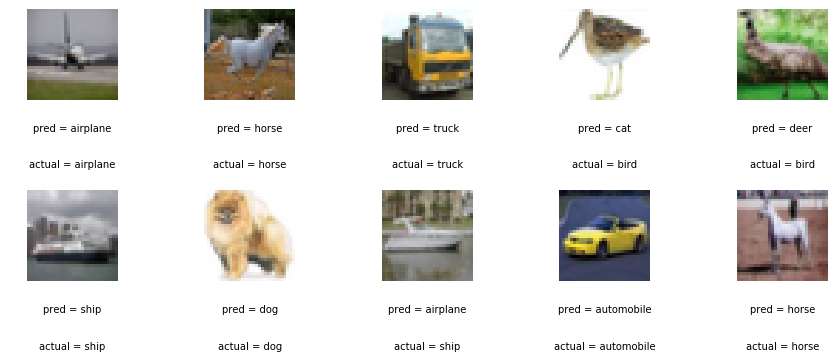

In [6]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test) # preds : [10000, 10]
preds_single = CLASSES[np.argmax(preds, axis = -1)]
    # argmax를 사용해 하나의 예측 결과로 변환, axis = -1을 통해 마지막 차원으로 배열 압축, preds_single : [10000, 1]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

number_to_show = 10
indices = np.random.choice(range(len(x_test)), number_to_show)

fig = plt.figure(figsize = (15, 5))
fig.subplots_adjust(hspace = 1, wspace = 0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(2, number_to_show/2, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize = 10, ha = 'center', transform = ax.transAxes)
    ax.text(0.5, -0.75, 'actual = ' + str(actual_single[idx]), fontsize = 10, ha = 'center', transform = ax.transAxes)
    ax.imshow(img)

